# Proyek Analisis Data: [Bike]
- **Nama:** Muhammad Fikri Abdullah
- **Email:** fikriiaabdul@gmail.com
- **ID Dicoding:** fikriiaabdullah

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh cuaca dan waktu (jam) terhadap jumlah sepeda yang disewa dalam satu hari?
2. Bagaimana musim dan suhu mempengaruhi total penyewaan sepeda, dan apakah ada perbedaan yang signifikan antara pengguna kasual dan terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv", delimiter=",")
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
hour_df = pd.read_csv("data/hour.csv", delimiter=",")
print(hour_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Mengumpulkan dataset yang berisi data tentang penyewaan sepeda berdasarkan faktor cuaca, waktu (jam), serta variabel lainnya seperti suhu dan musim.

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Data duplikasi di day.csv: ", day_df.duplicated().sum())  

Data duplikasi di day.csv:  0


In [68]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Data duplikasi di hour.csv: ", hour_df.duplicated().sum())  

Data duplikasi di hour.csv:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Menggunakan metode .describe() untuk mendapatkan ringkasan statistik dan .info() untuk melihat informasi umum tentang dataset, termasuk tipe data dan jumlah nilai yang tidak null.
- Mengidentifikasi nilai-nilai yang hilang atau tidak lengkap dalam dataset.
- Memeriksa apakah ada data yang duplikat.

### Cleaning Data

In [13]:
day_df.dropna(axis=0,inplace=True)

In [14]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
hour_df.dropna(axis=0,inplace=True)

In [16]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
all_data_clean = pd.concat([day_df, hour_df])

all_data_clean.to_csv('dashboard/main_data.csv', index=False)

print("Semua data berhasil digabungkan")

Semua data berhasil digabungkan


**Insight:**
- Karena pada saat Assessing Data tidak ditemukan data duplikat maka akan langung dilakukan pembersihan data yang tidak lengkap
- Melakukan Pengecekan apakah data masih ada yang tidak lengkap atau tidak
- Menyimpan semua dataset yang sudah dibersihkan ke dashboard/main_data.csv

## Exploratory Data Analysis (EDA)

### Explore dataset yang sudah dibersihkan dan dikumpulkan

In [18]:
print(all_data_clean)

       instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0            1  2011-01-01       1   0     1        0        6           0   
1            2  2011-01-02       1   0     1        0        0           0   
2            3  2011-01-03       1   0     1        0        1           1   
3            4  2011-01-04       1   0     1        0        2           1   
4            5  2011-01-05       1   0     1        0        3           1   
...        ...         ...     ...  ..   ...      ...      ...         ...   
17374    17375  2012-12-31       1   1    12        0        1           1   
17375    17376  2012-12-31       1   1    12        0        1           1   
17376    17377  2012-12-31       1   1    12        0        1           1   
17377    17378  2012-12-31       1   1    12        0        1           1   
17378    17379  2012-12-31       1   1    12        0        1           1   

       weathersit      temp     atemp       hum  windspeed  cas

In [25]:
# Mengecek statistik deskriptif dari data
print(all_data_clean.describe())

# Memastikan tidak ada nilai yang hilang
print(all_data_clean.isnull().sum())

            instant        season            yr          mnth       holiday  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean    8354.006405      2.501436      0.502485      6.537051      0.028769   
std     5180.771860      1.107045      0.500008      3.439213      0.167160   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3797.250000      2.000000      0.000000      4.000000      0.000000   
50%     8324.500000      3.000000      1.000000      7.000000      0.000000   
75%    12851.750000      3.000000      1.000000     10.000000      0.000000   
max    17379.000000      4.000000      1.000000     12.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean       3.003424      0.682772      1.424075      0.496922      0.475718   
std        2.005677      0.465410      0.635830    

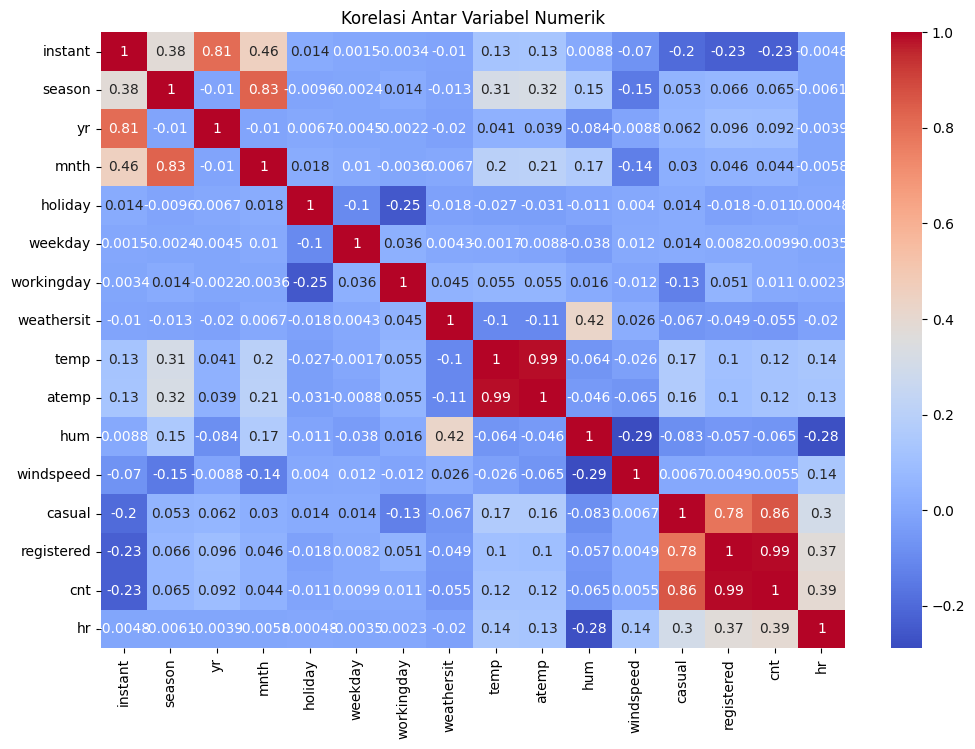

In [27]:
# Pilih hanya kolom numerik
numeric_columns = all_data_clean.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi antar variabel numerik
correlation_matrix = numeric_columns.corr()

# Visualisasikan korelasi menggunakan heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

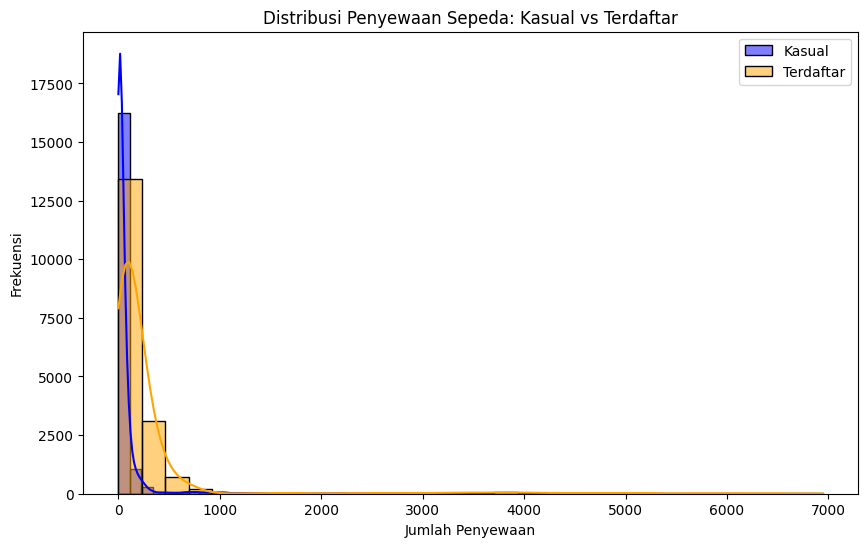

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(all_data_clean['casual'], bins=30, kde=True, color='blue', label='Kasual')
sns.histplot(all_data_clean['registered'], bins=30, kde=True, color='orange', label='Terdaftar')
plt.title('Distribusi Penyewaan Sepeda: Kasual vs Terdaftar')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

**Insight:**
- Suhu (temp) menunjukkan korelasi positif kuat dengan total penyewaan sepeda (cnt). Semakin hangat suhu, semakin banyak sepeda yang disewa.

- Kecepatan angin (windspeed) dan kelembapan (hum) memiliki korelasi negatif lemah dengan penyewaan sepeda, menunjukkan bahwa kondisi berangin atau lembap sedikit mengurangi jumlah penyewaan.

- Suhu aktual yang dirasakan (atemp) memiliki korelasi yang sangat kuat dengan suhu (temp), yang masuk akal karena keduanya saling berkaitan.

- Jumlah penyewaan kasual dan terdaftar masing-masing memiliki korelasi kuat dengan total penyewaan sepeda (cnt), menunjukkan bahwa keduanya adalah komponen utama dalam total penyewaan.

- Kondisi cuaca (weathersit) juga memiliki korelasi negatif, terutama dengan penyewaan kasual, yang berarti cuaca buruk mengurangi jumlah penyewaan, terutama oleh pengguna kasual.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca dan waktu (jam) terhadap jumlah sepeda yang disewa dalam satu hari?

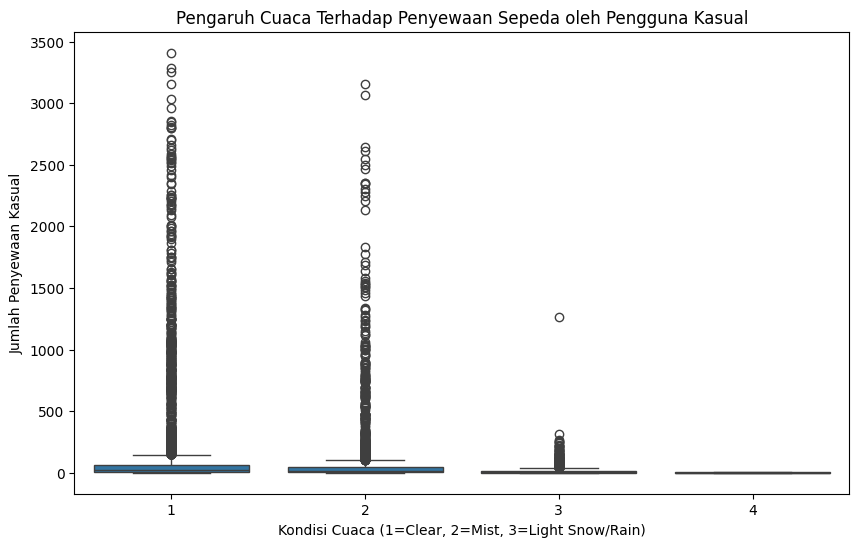

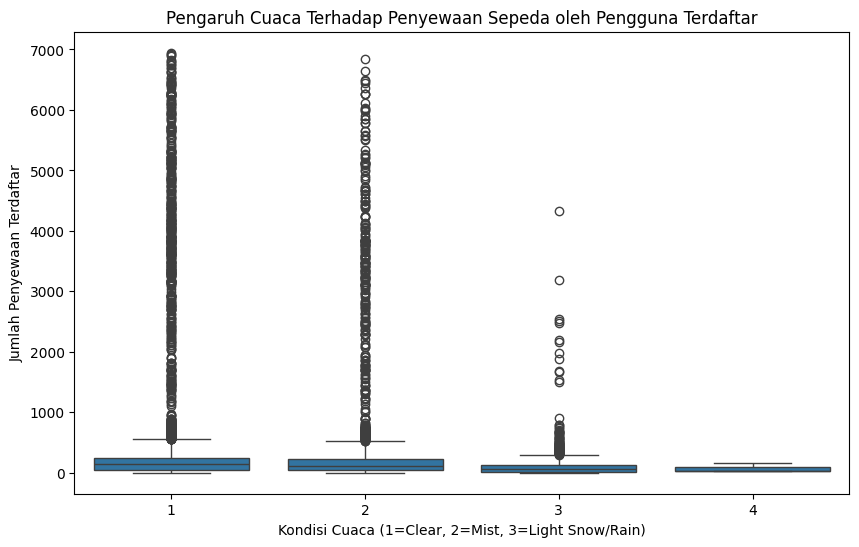

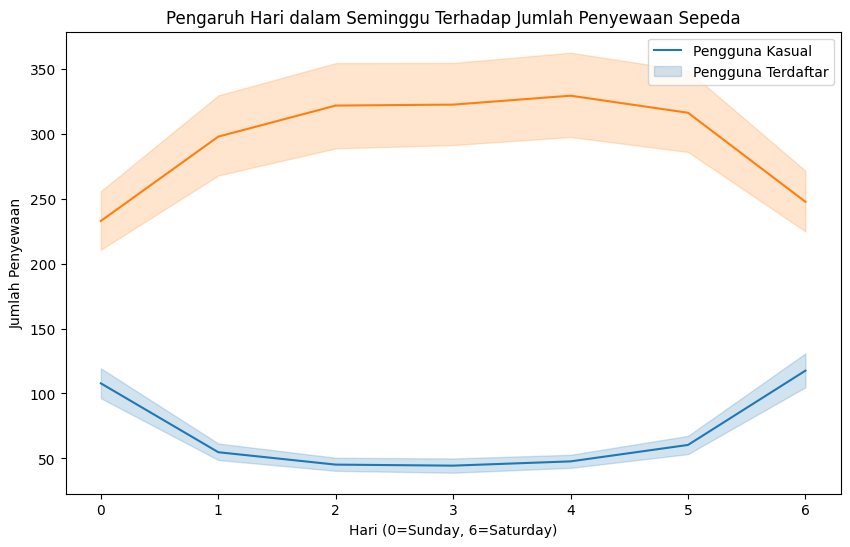

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting pengaruh cuaca terhadap penyewaan sepeda
plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit', y='casual', data=all_data_clean)
plt.title('Pengaruh Cuaca Terhadap Penyewaan Sepeda oleh Pengguna Kasual')
plt.xlabel('Kondisi Cuaca (1=Clear, 2=Mist, 3=Light Snow/Rain)')
plt.ylabel('Jumlah Penyewaan Kasual')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit', y='registered', data=all_data_clean)
plt.title('Pengaruh Cuaca Terhadap Penyewaan Sepeda oleh Pengguna Terdaftar')
plt.xlabel('Kondisi Cuaca (1=Clear, 2=Mist, 3=Light Snow/Rain)')
plt.ylabel('Jumlah Penyewaan Terdaftar')
plt.show()

# Plotting penyewaan sepeda berdasarkan hari
plt.figure(figsize=(10,6))
sns.lineplot(x='weekday', y='casual', data=all_data_clean)
sns.lineplot(x='weekday', y='registered', data=all_data_clean)
plt.title('Pengaruh Hari dalam Seminggu Terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Hari (0=Sunday, 6=Saturday)')
plt.ylabel('Jumlah Penyewaan')
plt.legend(['Pengguna Kasual', 'Pengguna Terdaftar'])
plt.show()


### Pertanyaan 2: Bagaimana musim dan suhu mempengaruhi total penyewaan sepeda, dan apakah ada perbedaan yang signifikan antara pengguna kasual dan terdaftar?

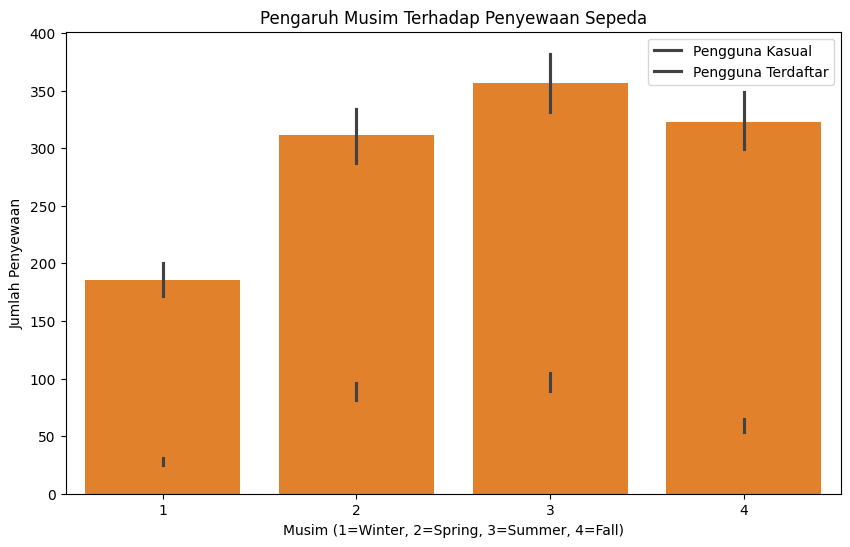

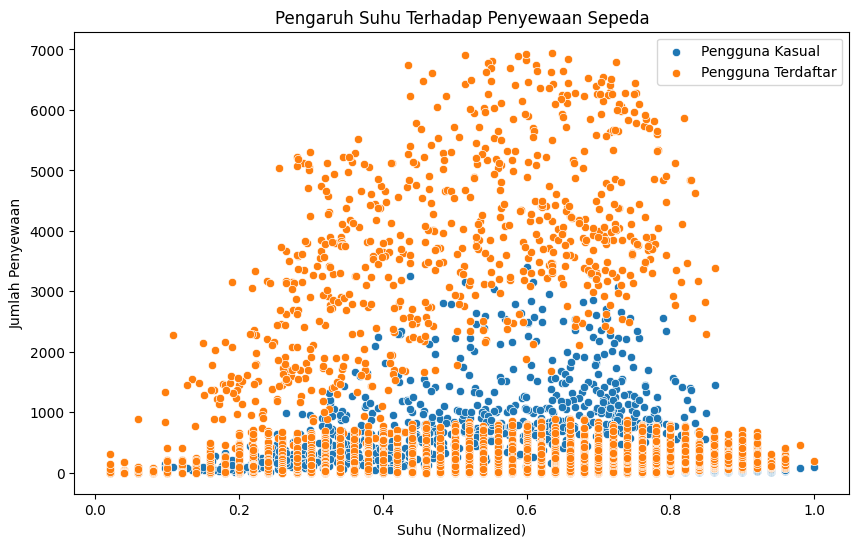

In [24]:
# Plotting pengaruh musim terhadap penyewaan sepeda
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='casual', data=all_data_clean)
sns.barplot(x='season', y='registered', data=all_data_clean)
plt.title('Pengaruh Musim Terhadap Penyewaan Sepeda')
plt.xlabel('Musim (1=Winter, 2=Spring, 3=Summer, 4=Fall)')
plt.ylabel('Jumlah Penyewaan')
plt.legend(['Pengguna Kasual', 'Pengguna Terdaftar'])
plt.show()

# Scatter plot pengaruh suhu terhadap penyewaan sepeda
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='casual', data=all_data_clean)
sns.scatterplot(x='temp', y='registered', data=all_data_clean)
plt.title('Pengaruh Suhu Terhadap Penyewaan Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan')
plt.legend(['Pengguna Kasual', 'Pengguna Terdaftar'])
plt.show()


**Insight untuk Pertanyaan 1: Pengaruh Cuaca dan Waktu terhadap Jumlah Penyewaan Sepeda**
1. Pengaruh Cuaca terhadap Penyewaan oleh Pengguna Kasual:
    - Cuaca yang cerah (kondisi 1) meningkatkan penyewaan sepeda oleh pengguna kasual.
    - Cuaca yang lebih buruk, seperti hujan ringan atau salju (kondisi 3), menurunkan jumlah penyewaan sepeda oleh pengguna kasual secara signifikan.
2. Pengaruh Cuaca terhadap Penyewaan oleh Pengguna Terdaftar:
    - Penyewaan oleh pengguna terdaftar juga lebih rendah pada kondisi cuaca yang buruk, tetapi penurunan jumlah penyewaan tidak seberapa tajam dibandingkan dengan pengguna kasual. Ini menunjukkan bahwa pengguna terdaftar cenderung lebih konsisten, meski cuaca buruk.
3. Pengaruh Waktu (Hari dalam Seminggu) terhadap Penyewaan Sepeda:
    - Pengguna kasual lebih banyak menyewa sepeda pada akhir pekan (Sabtu dan Minggu).
    - Pengguna terdaftar lebih konsisten menyewa sepeda pada hari kerja, dengan sedikit penurunan pada akhir pekan.

**Insight untuk Pertanyaan 2: Pengaruh Musim dan Suhu terhadap Penyewaan Sepeda**
1. Pengaruh Musim terhadap Penyewaan Sepeda:
    - Penyewaan oleh pengguna kasual meningkat tajam selama musim panas dan musim semi, sedangkan lebih rendah selama musim dingin.
    - Pengguna terdaftar juga lebih banyak menyewa sepeda pada musim panas, tetapi tingkat penyewaannya lebih stabil dibandingkan pengguna kasual di musim lain.
2. Pengaruh Suhu terhadap Penyewaan Sepeda:
    - Ada hubungan positif yang jelas antara suhu dan jumlah penyewaan sepeda. Suhu yang lebih hangat menyebabkan peningkatan penyewaan, baik untuk pengguna kasual maupun terdaftar.
    - Pengguna kasual lebih sensitif terhadap perubahan suhu dibandingkan pengguna terdaftar, dengan penurunan yang lebih signifikan ketika suhu lebih rendah.

## Analisis Lanjutan (Opsional)

## Conclusion

**Pertanyaan 1: Bagaimana pengaruh cuaca dan waktu (jam) terhadap jumlah sepeda yang disewa dalam satu hari?**
1. Cuaca:
    - Cuaca yang cerah mendorong peningkatan penyewaan sepeda, terutama oleh pengguna kasual. Sebaliknya, cuaca buruk seperti hujan atau salju menurunkan jumlah penyewaan secara signifikan, terutama untuk pengguna kasual.
    - Pengguna terdaftar cenderung lebih konsisten dalam menyewa sepeda meskipun cuaca kurang mendukung, meskipun jumlah penyewaan tetap lebih rendah di cuaca buruk.
2. Waktu (Hari dalam Seminggu):
    - Pengguna kasual cenderung menyewa lebih banyak sepeda di akhir pekan, menunjukkan pola penyewaan yang lebih santai.
    - Pengguna terdaftar lebih banyak menyewa sepeda pada hari kerja, dengan sedikit penurunan pada akhir pekan. Mereka cenderung menggunakan sepeda sebagai sarana transportasi harian.

**Pertanyaan 2: Bagaimana musim dan suhu mempengaruhi total penyewaan sepeda, dan apakah ada perbedaan yang signifikan antara pengguna kasual dan terdaftar?**
1. Musim:
    - Penyewaan sepeda meningkat selama musim panas dan musim semi, terutama oleh pengguna kasual. Sebaliknya, jumlah penyewaan menurun tajam selama musim dingin.
    - Pengguna terdaftar lebih konsisten sepanjang tahun, meskipun penyewaan mereka juga lebih tinggi pada musim panas.
2. Suhu:
    - Penyewaan sepeda meningkat seiring dengan kenaikan suhu. Semakin hangat cuaca, semakin banyak pengguna, terutama pengguna kasual, yang menyewa sepeda.
    - Pengguna kasual lebih sensitif terhadap perubahan suhu dibandingkan pengguna terdaftar, yang tetap cenderung menyewa sepeda pada suhu lebih rendah, meskipun dalam jumlah yang lebih kecil.